### 1. Business Understanding

#### Objective: To predict whether a wine is of good quality based on its physicochemical properties.
#### Target Variable: Wine quality (binary classification: quality ≥ 6 as "good", else "not good").

####  2. Data Collection and Preparation
##### ## 2.1 Data Collection

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Red wine Quality.csv'
data = pd.read_csv(file_path)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.2 Initial Data Assessment

In [2]:
# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

Dataset shape: (1599, 12)


In [3]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
# Summary statistics
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [5]:
# Check target variable distribution
print(data['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


## 2.3 Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Define target variable
# Assuming 'quality' is the target, converting it to binary classification
# e.g., quality >=7 as 'good' and <7 as 'not good'
data['quality_label'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Drop original 'quality' if not needed
data = data.drop('quality', axis=1)


# Check for missing values again
print(data.isnull().sum())

# Feature scaling
features = data.drop('quality_label', axis=1).columns
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Verify scaling
print(data.head())



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_label           0
dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.

### 3. Exploratory Data Analysis (EDA)

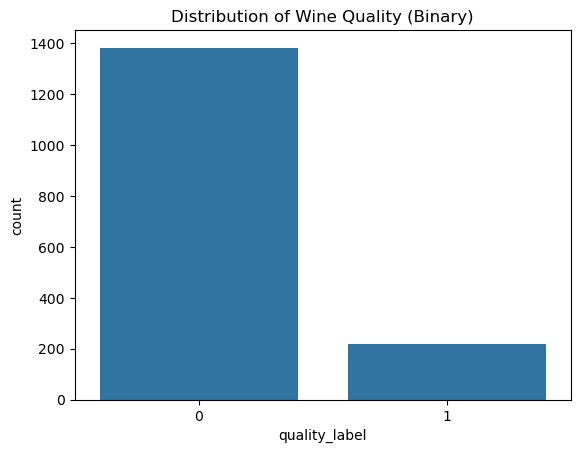

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.countplot(x='quality_label', data=data)
plt.title('Distribution of Wine Quality (Binary)')
plt.show()

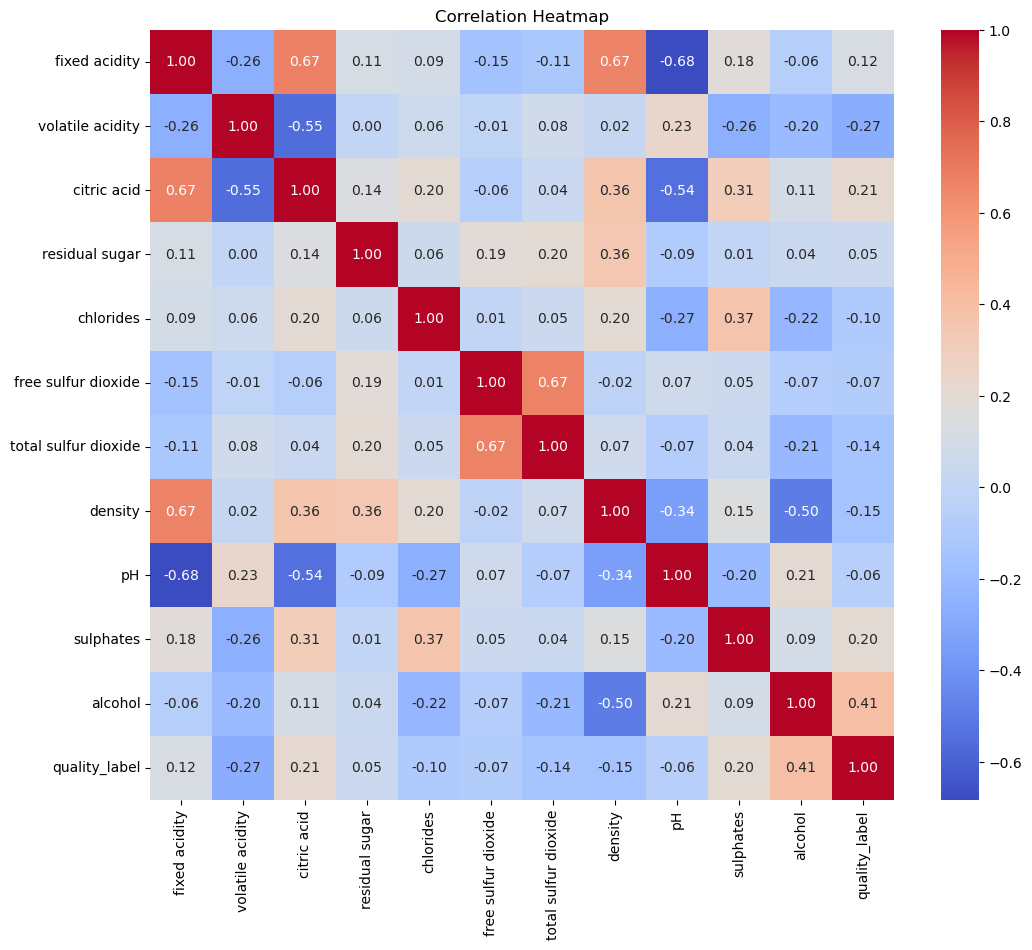

In [8]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\chira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


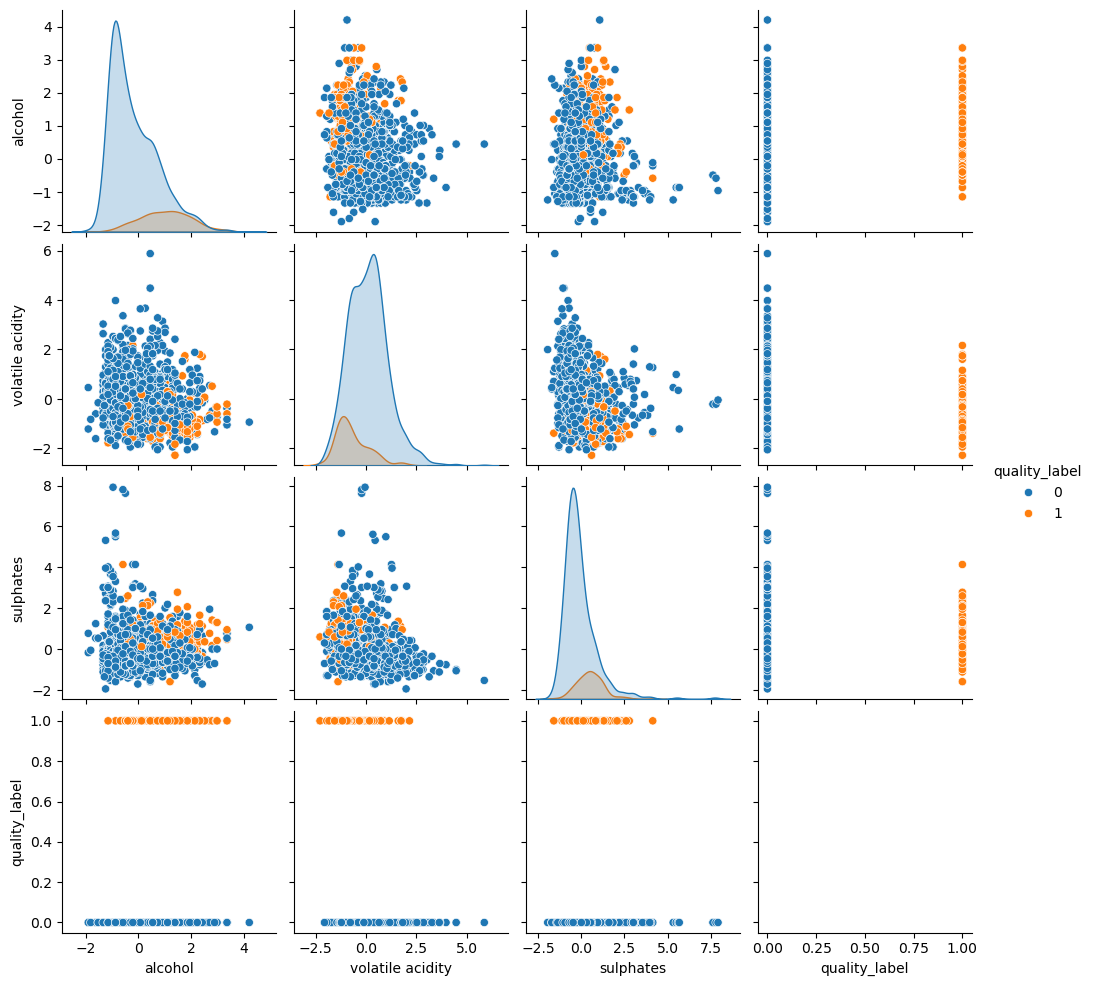

In [9]:
# Pairplot for a subset of features
sns.pairplot(data, vars=['alcohol', 'volatile acidity', 'sulphates', 'quality_label'], hue='quality_label')
plt.show()

### 4. Feature Engineering and Selection
#### 4.1 Feature Engineering and  Feature Selection

In [10]:
%pipeline = Pipeline([('logreg', logreg)  # Assuming 'logreg' is your logistic regression model])

UsageError: Line magic function `%pipeline` not found.


In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define feature matrix X and target y
X = data.drop('quality_label', axis=1)
y = data['quality_label']

# Initialize logistic regression estimator
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# Recursive Feature Elimination
rfe = RFE(logreg, n_features_to_select=10)
rfe = rfe.fit(X, y)

# Select features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Update X with selected features
X = X[selected_features]

Selected Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler

# Separating the features and the target
X = data.drop(columns=['quality_label'])
y = data['quality_label']

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 5. Model Development
#### 5.1 Data Splitting

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### 5.2 Model Building

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [17]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)

# Define logistic regression with L2 regularization
logreg = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000
)

# Create pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('logreg', logreg)
])

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

In [24]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Update pipeline with best estimator
best_pipeline = grid.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}


#### 6. Model Evaluation

In [68]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [29]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Logistic Regression Model Results:")
print("Accuracy:", accuracy)
print("confusion Matrix :", conf_matrix)
print("Precision:", precision)
print("recall:", recall)
print("F1 Score", f1)

Logistic Regression Model Results:
Accuracy: 0.89375
confusion Matrix : [[270   7]
 [ 27  16]]
Precision: 0.6956521739130435
recall: 0.37209302325581395
F1 Score 0.48484848484848486


### Decision tree classification

In [31]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred1 = model1.predict(X_test)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [34]:
accuracy1 = accuracy_score(y_test,y_pred1)
conf_matrix1 = confusion_matrix(y_test,y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test,y_pred1)
f11 = f1_score(y_test,y_pred1)

print("Decision Tree Classification Model Results:")
print("Accuracy:", accuracy1)
print("confusion Matrix :", conf_matrix1)
print("Precision:", precision1)
print("recall:", recall1)
print("F1 Score", f11)

Decision Tree Classification Model Results:
Accuracy: 0.9125
confusion Matrix : [[262  15]
 [ 13  30]]
Precision: 0.6666666666666666
recall: 0.6976744186046512
F1 Score 0.6818181818181818


In [35]:
model.score(X_train, y_train)

0.8811571540265832

In [36]:
model.score(X_test,y_test)

0.89375

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred2 = model2.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [43]:
accuracy2 = accuracy_score(y_test,y_pred2)
conf_matrix2 = confusion_matrix(y_test,y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test,y_pred2)
f12 = f1_score(y_test,y_pred2)

print("Random Forest Classification Model Results:")
print("Accuracy:", accuracy2)
print("confusion Matrix :", conf_matrix2)
print("Precision:", precision2)
print("recall:", recall2)
print("F1 Score", f12)

Random Forest Classification Model Results:
Accuracy: 0.9375
confusion Matrix : [[273   4]
 [ 16  27]]
Precision: 0.8709677419354839
recall: 0.627906976744186
F1 Score 0.7297297297297297


###  Support Vector Machine

In [45]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, y_train)

SVC()

In [47]:
y_pred3 = model3.predict(X_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [48]:
accuracy3 = accuracy_score(y_test,y_pred3)
conf_matrix3 = confusion_matrix(y_test,y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test,y_pred3)
f13 = f1_score(y_test,y_pred3)

print("SVM Model Results:")
print("Accuracy:", accuracy3)
print("confusion Matrix :", conf_matrix3)
print("Precision:", precision3)
print("recall:", recall3)
print("F1 Score", f13)

SVM Model Results:
Accuracy: 0.9
confusion Matrix : [[272   5]
 [ 27  16]]
Precision: 0.7619047619047619
recall: 0.37209302325581395
F1 Score 0.5


### # Navie bayes Calassifier

In [54]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
y_pred4

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [55]:
accuracy4 = accuracy_score(y_test,y_pred4)
conf_matrix4 = confusion_matrix(y_test,y_pred4)
precision4 = precision_score(y_test, y_pred4)
recall4 = recall_score(y_test,y_pred4)
f14 = f1_score(y_test,y_pred4)

print("Navie Bayes Model Results:")
print("Accuracy:", accuracy4)
print("confusion Matrix :", conf_matrix4)
print("Precision:", precision4)
print("recall:", recall4)
print("F1 Score", f14)

Navie Bayes Model Results:
Accuracy: 0.859375
confusion Matrix : [[244  33]
 [ 12  31]]
Precision: 0.484375
recall: 0.7209302325581395
F1 Score 0.5794392523364486


### KNeighborsClassifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model5 = KNeighborsClassifier(n_neighbors=3)
model5.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
 y_pred5 = model5.predict(X_test)
y_pred5

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [62]:
accuracy5 = accuracy_score(y_test, y_pred5)
conf_matrix5 = confusion_matrix(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
f15 = f1_score(y_test, y_pred5)
print("KNN Model Results:")
print("Accuracy:", accuracy5)
print("Confusion Matrix:", conf_matrix5)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f15)

KNN Model Results:
Accuracy: 0.89375
Confusion Matrix: [[265  12]
 [ 22  21]]
Precision: 0.6363636363636364
Recall: 0.4883720930232558
F1 Score: 0.5526315789473685


####  GradientBoostingClassifier

In [65]:
model6 = GradientBoostingClassifier()
model6.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
y_pred6 = model6.predict(X_test)
y_pred6

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [67]:
accuracy6 = accuracy_score(y_test, y_pred6)
conf_matrix6 = confusion_matrix(y_test, y_pred6)
precision6 = precision_score(y_test, y_pred6)
recall6 = recall_score(y_test, y_pred6)
f16 = f1_score(y_test, y_pred6)
print("Gradient Boosting Model Results:")
print("Accuracy:", accuracy6)
print("Confusion Matrix:", conf_matrix6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1 Score:", f16)

Gradient Boosting Model Results:
Accuracy: 0.915625
Confusion Matrix: [[271   6]
 [ 21  22]]
Precision: 0.7857142857142857
Recall: 0.5116279069767442
F1 Score: 0.6197183098591549


#### 6.1 Performance Metrics

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Predict on test set
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:,1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8094
Precision: 0.3953
Recall: 0.7907
F1-Score: 0.5271
ROC-AUC: 0.8857
Confusion Matrix:
[[225  52]
 [  9  34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       277
           1       0.40      0.79      0.53        43

    accuracy                           0.81       320
   macro avg       0.68      0.80      0.70       320
weighted avg       0.89      0.81      0.83       320



#### 6.2 Model Validation

In [20]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(best_pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean CV ROC-AUC: {cv_scores.mean():.4f}")

Cross-Validation ROC-AUC Scores: [0.87149321 0.86658048 0.88248222 0.87847447 0.85427203]
Mean CV ROC-AUC: 0.8707


#### 7. Model Interpretation

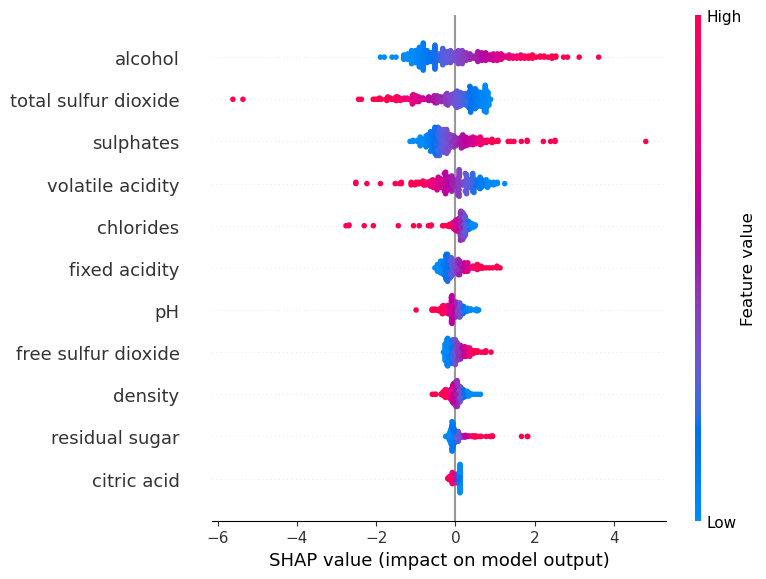

Feature Importance:
alcohol                 1.047385
total sulfur dioxide   -0.755582
sulphates               0.626066
volatile acidity       -0.555635
chlorides              -0.400651
fixed acidity           0.277810
residual sugar          0.224651
free sulfur dioxide     0.224292
pH                     -0.211960
density                -0.175287
citric acid            -0.077341
dtype: float64
                 Feature  Odds Ratio
10               alcohol    2.850189
9              sulphates    1.870239
0          fixed acidity    1.320235
3         residual sugar    1.251886
5    free sulfur dioxide    1.251436
2            citric acid    0.925574
7                density    0.839216
8                     pH    0.808997
4              chlorides    0.669884
1       volatile acidity    0.573708
6   total sulfur dioxide    0.469737


In [21]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_pipeline.named_steps['logreg'], X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Feature importance based on coefficients
coefficients = best_pipeline.named_steps['logreg'].coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(key=lambda x: abs(x), ascending=False)
print("Feature Importance:")
print(feature_importance)

# Odds ratios
odds_ratios = np.exp(coefficients)
odds_ratios_df = pd.DataFrame({
    'Feature': X.columns,
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)
print(odds_ratios_df)


#### 8. Model Deployment and Monitoring
Deployment and monitoring typically involve creating APIs, setting up pipelines, and monitoring tools which are beyond the scope of this script. However, here's a basic example of saving the model for deployment.

In [22]:
import joblib

# Save the model
joblib.dump(best_pipeline, 'logistic_regression_wine_model.pkl')

print("Model saved as 'logistic_regression_wine_model.pkl'")


Model saved as 'logistic_regression_wine_model.pkl'


In [69]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a trained GradientBoostingClassifier object called 'model'
model2 = RandomForestClassifier()

# Sample input data
Testing_data_value = np.array([ 7.4, 0.7, 0.1,0.086, 1.9, 11.0,34.0,0.9976,3.52,0.56,9.4])

# Reshape the input data to a 2D array
Testing_data_value_reshape = Testing_data_value.reshape(1, -1)

# Predict the class using the reshaped input data
prediction = model.predict(Testing_data_value_reshape)

if prediction[0] == 1:
    print("GOOD QUALITY WINE.")
else:
    print("GOOD QUALITY BAD.")

GOOD QUALITY BAD.


C:\Users\chira\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
